<a href="https://colab.research.google.com/github/Jcnok/Bootcamp_XPe_Arquiteto_de_ML/blob/main/Trabalho_Pratico1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Prático - Módulo 1: Fundamentos de Deep Learning

## Objetivos de Ensino:


* **Exercitar os seguintes conceitos trabalhados no Módulo:**
  * **1. Interpretar arquiteturas de rede a partir de desenho.**
  * **2. Criar redes utilizando o Keras.**


## Enunciado:

**Neste trabalho, você utilizará duas redes para resolver o problema de classificação Fashion
MNIST, que pode ser importado através do módulo ‘datasets’ do Keras. As redes a serem
utilizadas são:**
* **1.VGG-16, que pode ser importada através do módulo ‘keras.applications.vgg16’. A VGG-16 é
uma rede já pronta (ou seja, o número de camadas e neurônios em cada camada, por
exemplo, já estão pré-definidos) que resolve o problema de classificação de imagens. Ou seja,
nós não iremos criar uma rede do zero: ao invés disso, usaremos uma rede que já foi
experimentada antes em outros problemas, e inclusive já podem vir com um conjunto de
pesos, obtidos dos seus treinamentos anteriores. Mais informações sobre a VGG-16 podem
ser obtidas em https://keras.io/api/applications/vgg/ e https://arxiv.org/abs/1409.1556.**

* **2.A segunda deve seguir a seguinte arquitetura, conforme já vimos nas aulas gravadas:**
  * a. Camada de entrada: um neurônio por pixel;
  * b. Camada oculta 1: número de neurônios igual ao número de pixels;
  * c. Camada oculta 2: 1024 neurônios;
  * d. Camada oculta 3: 2048 neurônios;
  * e. Camada oculta 4: 2048 neurônios;
  * f. Camada de saída.

* **Observações**:

  * 1) A VGG-16 inicialmente foi treinada para imagens coloridas. Portanto, é necessário que ela
receba imagens com canais de cor. Ou seja, cada pixel da imagem será representado por mais
de um valor. Tipicamente, utilizamos o sistema de cor RGB, ou seja, cada pixel da imagem é
composto por três valores. Podemos dizer, portanto, que uma imagem de 32 pixels de largura
e 32 pixels de altura no sistema RGB tem uma dimensionalidade de 32x32x3.
  * 2) Como as imagens do Fashion MNIST são em tons de cinza (ou seja, só possuem um canal de cor e, portanto, cada imagem tem o tamanho 28x28x1), é necessário redimensionar as imagens do dataset para 32x32x3, adicionando outros dois canais para usar o VGG-Net. Uma técnica possível é a seguinte:




In [149]:
'''
from tensorflow.image import resize
# Adiciona eixo no último índice da lista
X_train_1 = np.expand_dims(X_train, axis=-1)
# Repete 3 vezes o último índice
X_train_1 = np.repeat(X_train_1, 3, axis=-1)
# Redimensiona as imagens para 32x32
X_train_resize = resize(X_train_1, [32,32])
'''

'\nfrom tensorflow.image import resize\n# Adiciona eixo no último índice da lista\nX_train_1 = np.expand_dims(X_train, axis=-1)\n# Repete 3 vezes o último índice\nX_train_1 = np.repeat(X_train_1, 3, axis=-1)\n# Redimensiona as imagens para 32x32\nX_train_resize = resize(X_train_1, [32,32])\n'

  * 3) Para instanciar a VGG-Net, informe a dimensionalidade das amostras através do argumento
input_shape=(32,32,3). Além disso, preste atenção ao número de classes do problema.
  * 4) A rede VGG-Net deverá receber amostras com o tamanho (32,32,3). A segunda rede deverá
receber amostras (28,28,1). Para fazer isso, você pode importar o dataset duas vezes.
  * 5) Ao instanciar a VGG-Net, informe o parâmetro weights=None. Esse parâmetro informa que
os pesos da VGG-Net serão iniciados de forma aleatória e, portanto, não utilizaremos o
treinamento já realizado na VGG-16.
  * 6) Perceba que é muito mais fácil importar uma rede já existente do que criar a sua própria rede.

## Dicionário de dados:

Label	Description:
* **0	T-shirt/top**
* **1	Trouser**
* **2	Pullover**
* **3	Dress**
* **4	Coat**
* **5	Sandal**
* **6	Shirt**
* **7	Sneaker**
* **8	Bag**
* **9	Ankle boot**

# Exercício 01

In [20]:
dic = {
        0 :'T-shirt/top',
        1 : 'Trouser',
        2 : 'Pullover',
        3 : 'Dress',
        4 : 'Coat',
        5 : 'Sandal',
        6 : 'Shirt',
        7 : 'Sneaker',
        8 : 'Bag',
        9 : 'Ankle boot',
      }

### Impotando as Bibliotécas e carregando da dataset:

In [3]:
import numpy as np #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos

#início das importações de classes do Keras (modelos de Deep Learning)
from keras.datasets import fashion_mnist   #importa dataset fashion mnist
from keras.models import Sequential        #importa um modelo sequencial
from keras.layers import Dense, InputLayer #importa camadas totalmente conectadas
from keras.layers import Dropout           #importa a estrutura de dropout
from keras.utils import np_utils           #importa biblioteca de utilidades do Keras
from keras.applications import VGG16       #importando a rede já pré-treinada
from keras import models, layers
from tqdm import tqdm # for progress bar
from tensorflow.image import resize
import random

In [27]:
# Carregando o dataset já divididos em treino e teste.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [28]:
# verificando o tamanho.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


* **Temos um  total de 60mil imagens de tamanho 28x28 pixels para realizarmos o treinamento do modelo**.
* **Temos 10mil imgagens 28x28 pixels para realizarmos o teste do modelo.**
* **Essas imagens estão em preto e branco(escala cinza) pois possuem apenas 2 dimensões.**

* **Para a primeira rede(modelo) precisamos redimensionar a imagem, pois o modelo VGG16 não aceita imagens e um canal e com pixels 28x28.**
* **O código abaixo irá converter a dimensão 3 canais(RGB-colorido) e os pixels para 32x32 pixels**.

### Pré-processamento:

In [29]:
# Adiciona eixo no último índice da lista
X_train_1 = np.expand_dims(X_train, axis=-1)
X_test_1 = np.expand_dims(X_test, axis=-1)
# resultado:
X_train_1.shape, X_test_1.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
# Repete 3 vezes o último índice
X_train_1 = np.repeat(X_train_1, 3, axis=-1)
X_test_1 = np.repeat(X_test_1, 3, axis=-1)
# resultado:
X_train_1.shape, X_test_1.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [31]:
# Redimensiona as imagens para 32x32
X_train_1 = resize(X_train_1, [32,32])
X_test_1 = resize(X_test_1, [32,32])
# resultado:
X_train_1.shape, X_test_1.shape 

(TensorShape([60000, 32, 32, 3]), TensorShape([10000, 32, 32, 3]))

In [32]:
# Convertendo as Labels para o formato one hot encod.
y_train_1 = np_utils.to_categorical(y_train)
y_test_1 = np_utils.to_categorical(y_test)
# Resultado
y_train_1.shape, y_test_1.shape


((60000, 10), (10000, 10))

In [25]:
# Número de classes
n_classes = y_test_1.shape[1]
#resposta:
print(f"Quantidade de classes:{n_classes}")

Quantidade de classes:10


In [26]:
#calcula o total de pixels da imagem
num_pixels = X_train_1.shape[1] * X_train_1.shape[2] * X_train_1.shape[3]  
print(f"Total de pixels em uma imagem: {num_pixels}")

Total de pixels em uma imagem: 3072


* **Agora que já redimensionamos o conjunto de treino e teste, temos os valores correspondentes ao tamanho de pixels de cada imagem, quantidade de classes e valor em formato de vetor(one hot enc) de cada classe, podemos começar a criar o nosso modelo.**

In [36]:
print(f"total de pixel em uma imagem: {num_pixels}")
print(f"Classe da figura de índice 4000 do conjunto de treino: {dic[y_train[4000]]}")
print(f"Classe {y_train[4000]} transfomado em vetor do conjunto de treino: {y_train_1[4000]}")

total de pixel em uma imagem: 3072
Classe da figura de índice 4000 do conjunto de treino: Bag
Classe 8 transfomado em vetor do conjunto de treino: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Criando o modelo com VGG16:

In [35]:
#Instanciando o modelo e informando o shape conforme o enunciado.
model_vgg16 = VGG16(weights=None, input_shape=(32,32,3), classes=10)
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [36]:
# Compilando o modelo
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [39]:
# Executando o treinamento
result = model_vgg16.fit(X_train_1, y_train_1, validation_data=(X_test_1, y_test_1), epochs=10, verbose=1, batch_size = 100) 

Epoch 1/10
600/600 [==============================] - 36s 59ms/step - loss: 1.1058 - accuracy: 0.6215 - val_loss: 0.4610 - val_accuracy: 0.8435
Epoch 2/10
600/600 [==============================] - 35s 58ms/step - loss: 0.4034 - accuracy: 0.8577 - val_loss: 0.3783 - val_accuracy: 0.8655
Epoch 3/10
600/600 [==============================] - 35s 58ms/step - loss: 0.3559 - accuracy: 0.8735 - val_loss: 0.3916 - val_accuracy: 0.8657
Epoch 4/10
600/600 [==============================] - 36s 60ms/step - loss: 0.3176 - accuracy: 0.8879 - val_loss: 0.3067 - val_accuracy: 0.8918
Epoch 5/10
600/600 [==============================] - 36s 59ms/step - loss: 0.3093 - accuracy: 0.8928 - val_loss: 0.3532 - val_accuracy: 0.8851
Epoch 6/10
600/600 [==============================] - 36s 59ms/step - loss: 0.2738 - accuracy: 0.9047 - val_loss: 0.3109 - val_accuracy: 0.8953
Epoch 7/10
600/600 [==============================] - 35s 58ms/step - loss: 0.2581 - accuracy: 0.9098 - val_loss: 0.2994 - val_accuracy:

In [40]:
# Realizando a previsão de uma única imagem
#obtém a imagem número 1001
x = X_test_1[4000]
print(f"tamanho da imagem de índice 4000 do conjunto de teste: {x.shape}\n")

# Adiciona eixo no primeiro índice
x = np.expand_dims(x, axis=0)
print(f"Resultado após adição de eixo: {x.shape}\n")

# imprime a avaliação da amostra
print(f"Resultado das probabilidades de cada classe: {model_vgg16.predict(x)}\n")
print(f"Resultado da classe predita: {dic[np.argmax(model_vgg16.predict(x))]}\n")

tamanho da imagem de índice 4000 do conjunto de teste: (32, 32, 3)

Resultado após adição de eixo: (1, 32, 32, 3)

1/1 [==============================] - 0s 406ms/step
Resultado das probabilidades de cada classe: [[9.5136452e-01 2.4567605e-06 7.8622979e-04 2.8079734e-04 7.6515425e-06
  1.4520448e-07 4.7555152e-02 4.2303284e-08 2.9783730e-06 6.0693239e-08]]

1/1 [==============================] - 0s 15ms/step
Resultado da classe predita: T-shirt/top



In [ ]:
# Realizando a predição de todo conjunto de teste e adicionando os resultados em uma array.
predictions=[]

for img in tqdm(X_test_1):
    img = np.expand_dims(img, axis=0)
    predictions.append(model_vgg16.predict(img))
    time.sleep(0.1)

In [44]:
# # listing the folders containing images

# preparing array that can be used later

class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

val_class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(val_class_names)

test_class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0 :'T-shirt/top',
        1 : 'Trouser',
        2 : 'Pullover',
        3 : 'Dress',
        4 : 'Coat',
        5 : 'Sandal',
        6 : 'Shirt',
        7 : 'Sneaker',
        8 : 'Bag',
        9 : 'Ankle boot',
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
T-shirt/top


In [1]:
from IPython.display import Image
from keras.applications.vgg16 import preprocess_input

# Esta função ajuda a prever a imagem individual fornecida a ela
# Função 1
def predict(img_name):
    img=image.load_img(img_name,target_size=(32,32))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,32,32,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Função 2
# Esta função plota a imagem fornecida no array
def plot_image(i, predictions_array, true_label, img): 
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: 
        color='blue' 
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))        

# Função 3

# Esta função plota o gráfico de barras fornecido nos dados da matriz
def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Classificação com (VGG16)

predito, Porcentagem, (real)



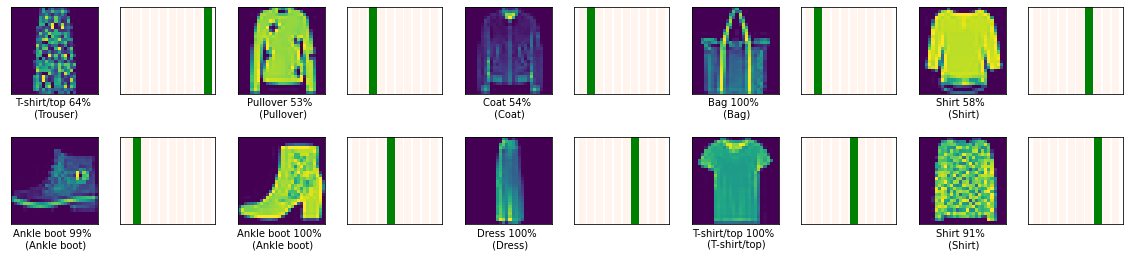

In [52]:
# variaveis
num_rows=2
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classificação com (VGG16)\n")
print("predito, Porcentagem, (real)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    plot_image(ii,predictions, y_test_1, X_test)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, y_test_1)
plt.subplots_adjust(hspace=0.5)
plt.show()

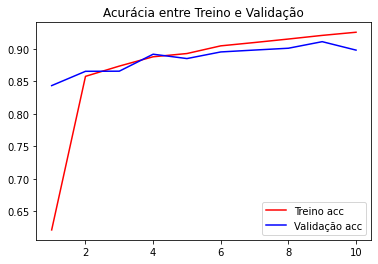

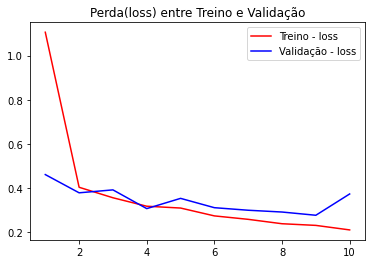

In [43]:
# plot loss e accuracy

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Acurácia entre Treino e Validação')
plt.plot(epochs, acc, 'red', label='Treino acc')
plt.plot(epochs, val_acc, 'blue', label='Validação acc')
plt.legend()

plt.figure()
plt.title('Perda(loss) entre Treino e Validação')
plt.plot(epochs, loss, 'red', label='Treino - loss')
plt.plot(epochs, val_loss, 'blue', label='Validação - loss')

plt.legend()

plt.show()

# Exercício 2

(60000, 28, 28)


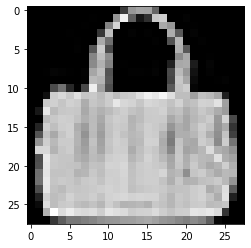

8


In [5]:
# Carregando o dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #importa o dataset Mnist da biblioteca do Keras
print(X_train.shape) #imprime o tamanho do vetor

first_image = X_train[4000] #obtém a imagem de treino no índice 4000 do vetor
# realiza manipulação dos dados da imagem
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_train[4000]) #imprime a classe da imagem de treino do índice 4000

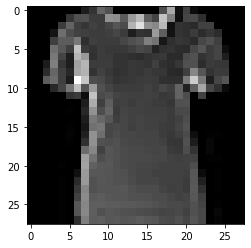

0


In [6]:
# resposta da pergunta 8
first_image = X_test[4000] #obtém a imagem de treino no índice 4000 do vetor
# realiza manipulação dos dados da imagem
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_test[4000]) #imprime a classe da imagem de treino do índice 4000

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]  #calcula o total de pixels da imagem
print(num_pixels)

#tranforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

784


In [8]:
# transforma os y em one-hot vector
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

#otém o número de classes do problema
num_classes = y_test_h.shape[1]

print(f"Quantidade de pixels:{num_pixels}")
print(f"Classe correspondente ao índice 4000: {y_train[4000]}")
print(f"Vetor correspondente a classe {y_train[4000]}: {y_train_h[4000]}")

Quantidade de pixels:784
Classe correspondente ao índice 4000: 8
Vetor correspondente a classe 8: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [9]:
num_pixels

784

In [10]:
# Cria um modelo do tipo sequencial
model = Sequential()

model.add(InputLayer(input_shape = num_pixels)) # Camada de entrada: um neurônio por pixel;
model.add(Dense(num_pixels, kernel_initializer='normal', activation='relu')) # Camada oculta 1: número de neurônios igual ao número de pixels;
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) # Camada oculta 2: 1024 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 3: 2048 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 4: 2048 neurônios;
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # cria a camada de saída

model.summary() #imprime informações sobre o modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 1024)              803840    
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Cria um modelo do tipo sequencial
model = Sequential()

model.add(InputLayer(input_shape = num_pixels)) # Camada de entrada: um neurônio por pixel;
model.add(Dense(num_pixels, kernel_initializer='normal', activation='relu')) # Camada oculta 1: número de neurônios igual ao número de pixels;
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) # Camada oculta 2: 1024 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 3: 2048 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 4: 2048 neurônios;
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # cria a camada de saída

model.summary() #imprime informações sobre o modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_9 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [13]:
#compilando o modelo criado.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') 

In [15]:
# execulta o treinamento.
result = model.fit(X_train2,y_train_h, validation_data=(X_test2,y_test_h), epochs=20, verbose=1, batch_size=100) 

Epoch 1/20
600/600 [==============================] - 100s 166ms/step - loss: 0.3967 - accuracy: 0.8564 - val_loss: 0.3807 - val_accuracy: 0.8618
Epoch 2/20
600/600 [==============================] - 89s 148ms/step - loss: 0.3426 - accuracy: 0.8733 - val_loss: 0.3895 - val_accuracy: 0.8608
Epoch 3/20
600/600 [==============================] - 88s 147ms/step - loss: 0.3152 - accuracy: 0.8830 - val_loss: 0.3669 - val_accuracy: 0.8659
Epoch 4/20
600/600 [==============================] - 92s 154ms/step - loss: 0.2933 - accuracy: 0.8919 - val_loss: 0.3527 - val_accuracy: 0.8723
Epoch 5/20
600/600 [==============================] - 93s 155ms/step - loss: 0.2768 - accuracy: 0.8959 - val_loss: 0.3477 - val_accuracy: 0.8783
Epoch 6/20
600/600 [==============================] - 95s 158ms/step - loss: 0.2678 - accuracy: 0.8997 - val_loss: 0.3629 - val_accuracy: 0.8733
Epoch 7/20
600/600 [==============================] - 92s 154ms/step - loss: 0.2540 - accuracy: 0.9044 - val_loss: 0.3450 - val_a

In [21]:
# Realizando a previsão de uma única imagem
#obtém a imagem número 1001
x = X_test2[4000]
print(f"tamanho da imagem de índice 4000 do conjunto de teste: {x.shape}\n")

# Adiciona eixo no primeiro índice
x = np.expand_dims(x, axis=0)
print(f"Resultado após adição de eixo: {x.shape}\n")

# imprime a avaliação da amostra
print(f"Resultado das probabilidades de cada classe: {model.predict(x)}\n")
print(f"Resultado da classe predita: {dic[np.argmax(model.predict(x))]}\n")

tamanho da imagem de índice 4000 do conjunto de teste: (784,)

Resultado após adição de eixo: (1, 784)

1/1 [==============================] - 0s 19ms/step
Resultado das probabilidades de cada classe: [[9.8109150e-01 3.3639955e-09 8.6576375e-07 1.7096028e-05 8.0623056e-07
  1.7227844e-09 1.8889720e-02 1.0046431e-11 5.6882151e-08 7.8887374e-12]]

1/1 [==============================] - 0s 18ms/step
Resultado da classe predita: T-shirt/top



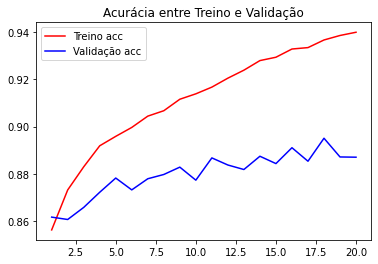

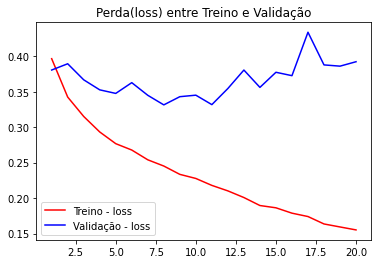

In [22]:
# plot loss e accuracy

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Acurácia entre Treino e Validação')
plt.plot(epochs, acc, 'red', label='Treino acc')
plt.plot(epochs, val_acc, 'blue', label='Validação acc')
plt.legend()

plt.figure()
plt.title('Perda(loss) entre Treino e Validação')
plt.plot(epochs, loss, 'red', label='Treino - loss')
plt.plot(epochs, val_loss, 'blue', label='Validação - loss')

plt.legend()

plt.show()

# Questões do Trabalho Prático 1

### 1- O elemento do índice 4000 do vetor de treinamento corresponde a qual classe? 

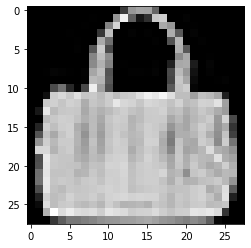

8


In [23]:
first_image = X_train[4000] #obtém a imagem de treino no índice 4000 do vetor
# realiza manipulação dos dados da imagem
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_train[4000]) #imprime a classe da imagem de treino do índice 4000

### 2- Quantos são os parâmetros treináveis da VGG16? 

In [49]:
#Instanciando o modelo e informando o shape conforme o enunciado.
model_vgg16 = VGG16(weights=None, input_shape=(32,32,3), classes=10)
model_vgg16.count_params()

33638218

### 3- Quantos são os parâmetros treináveis da segunda rede criada? 

In [50]:
# Cria um modelo do tipo sequencial
model = Sequential()

model.add(InputLayer(input_shape = num_pixels)) # Camada de entrada: um neurônio por pixel;
model.add(Dense(num_pixels, kernel_initializer='normal', activation='relu')) # Camada oculta 1: número de neurônios igual ao número de pixels;
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) # Camada oculta 2: 1024 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 3: 2048 neurônios;
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 4: 2048 neurônios;
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # cria a camada de saída

model.count_params() #imprime informações sobre o modelo

7735322

### 4- Quantos são os pixels de cada amostra depois de transformadas para serem utilizadas na Vgg-Net?

In [33]:
#calcula o total de pixels da imagem
num_pixels = X_train_1.shape[1] * X_train_1.shape[2] * X_train_1.shape[3]  
print(f"Total de pixels em uma imagem: {num_pixels}")

Total de pixels em uma imagem: 3072


### 5- Caso você tente utilizar a VGG-Net com as imagens originais, sem redimensionamento, qual erro é obtido durante o treinamento?

In [37]:
# Executando o treinamento
result = model_vgg16.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size = 100)

Epoch 1/2


ValueError: ignored

### 6- Quantas são as classes presentes no problema?


In [18]:
np.unique(y_test).shape


(10,)

### 7- Quantos são os pixels de cada amostra para serem utilizados na segunda rede?

In [38]:
num_pixels = X_train.shape[1] * X_train.shape[2]  #calcula o total de pixels da imagem
print(f"Quantidade de pixels de cada amostra: {num_pixels}")

Quantidade de pixels de cada amostra: 784


### 8- O elemento do índice 4000 do vetor de teste corresponde à qual classe?

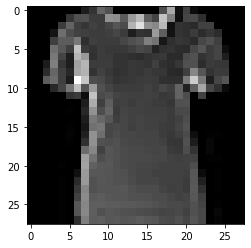

0


In [39]:
# resposta da pergunta 8
first_image = X_test[4000] #obtém a imagem de treino no índice 4000 do vetor
# realiza manipulação dos dados da imagem
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_test[4000]) #imprime a classe da imagem de treino do índice 4000

### 9- Se você utilizar a função de ativação relu na camada de saída da segunda rede, qual o valor obtido na loss?

In [40]:
# Cria um modelo do tipo sequencial
question9 = Sequential()

question9.add(InputLayer(input_shape = num_pixels)) # Camada de entrada: um neurônio por pixel;
question9.add(Dense(num_pixels, kernel_initializer='normal', activation='relu')) # Camada oculta 1: número de neurônios igual ao número de pixels;
question9.add(Dense(1024, kernel_initializer='normal', activation='relu')) # Camada oculta 2: 1024 neurônios;
question9.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 3: 2048 neurônios;
question9.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 4: 2048 neurônios;
question9.add(Dense(num_classes, kernel_initializer='normal', activation='relu')) # cria a camada de saída
#compilando o modelo criado.
question9.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') 
# execulta o treinamento.
res_question = question9.fit(X_train2,y_train_h, validation_data=(X_test2,y_test_h), epochs=2, verbose=1, batch_size=128) 

Epoch 1/2
469/469 [==============================] - 96s 203ms/step - loss: nan - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/2
469/469 [==============================] - 88s 188ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


### 10- Quantos bias são presentes na segunda rede?

In [46]:
bias = (784 + 1024 + 2048 + 2048 + 10)
print(f"Quantidade de bias da rede 2: {bias}")

Quantidade de bias da rede 2: 5914


### 11- Quantas camadas do tipo ‘MaxPooling2D’ estão presentes na VGG-Net?

In [141]:
model_vgg16.layers
#MaxPooling2D = 5

### 12- Quantas camadas totalmente conectadas estão presentes na VGG-Net? 


In [ ]:
# R: 3

### 13- Execute a Vgg-Net com um batch de 128. Quantas iterações são necessárias para completar uma época?

In [ ]:
# Executando o treinamento
result = model_vgg16.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, verbose=1, batch_size = 128)
# 469

### 14- Quantas camadas do tipo ‘Conv2D’ estão presentes na VGG-Net? 

In [143]:
model_vgg16.layers
#R: 13

### 15- Quantos pesos existem conectando a penúltima e última camadas da segunda rede?

In [146]:
# Cria um modelo do tipo sequencial
question15 = Sequential()

question15.add(InputLayer(input_shape = num_pixels)) # Camada de entrada: um neurônio por pixel;
question15.add(Dense(num_pixels, kernel_initializer='normal', activation='relu')) # Camada oculta 1: número de neurônios igual ao número de pixels;
question15.add(Dense(1024, kernel_initializer='normal', activation='relu')) # Camada oculta 2: 1024 neurônios;
question15.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 3: 2048 neurônios;
question15.add(Dense(2048, kernel_initializer='normal', activation='relu')) # Camada oculta 4: 2048 neurônios;
question15.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # cria a camada de saída
question15.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 784)               615440    
                                                                 
 dense_36 (Dense)            (None, 1024)              803840    
                                                                 
 dense_37 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_38 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_39 (Dense)            (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [148]:
pesos = (10 * 2048)
pesos

20480